## OCR using Tesseract and EasyOCR

In [4]:
import cv2
import pytesseract
from PIL import Image

# Load and preprocess
image = cv2.imread("../uploads/images/page_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save cleaned image (optional)
cv2.imwrite("cleaned.jpg", thresh)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
poppler_path = r'C:\Users\ProBook\Documents\PFA\Release-24.08.0-0\poppler-24.08.0\Library\bin'

# OCR
text = pytesseract.image_to_string(thresh, lang='fra')


In [1]:
# !python -m pip install easyocr

import easyocr
import torch

if torch.cuda.is_available():
    print(f"GPU available: {torch.cuda.device_count()} devices")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")
reader = easyocr.Reader(['fr'])  # Arabic
results = reader.readtext('../uploads/images/page_1.jpg', paragraph=True, detail=0)
print("\n".join(results))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

c:\Users\fkhaldi\Documents\SUPMTI\PFA\projet_pfa\aidoc\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


MODÈLE FOURNI PAR Batappli Lagiciel batimant
Ges ARTISANs SARL
Travaux DU BÂTIMENT NEUF ET RENOUATION
wwwbatappli_tr
Nom du client Adresse du client Code postal et ville du client
AVOIR Numéro AV5O Date 10/06/2024
N' TVA du client
Avoir sur facture n*24 émise le 14/04/24
Objet Exemple de chantier et de prestation
Libellé
Prix U
Qté
U
Total HT
% tva
TVA
Total TTC
D'après le Devis N'254 du 11/02/24
Exemple de travaux Exemple de travaux Exemple de travaux
100,00 € 10,00 € 100,00 €
4,00 U 100,00/ m2 2,00 m2
400,00 € 1 000,00 € 200,00 €
20,00 10,00 20,00
80,00 € 100,00 € 40,00 €
480,00 € 100,00 € 240,00 €
Adresse de chantier Nom du client Adresse du chantier Code postal Ville
Total HT TVA à 10% TVA à 20% Total TVA Net à déduire
600,00 € 100,00 € 120,00 € 220,00 € 820,00 €
Date d'échéance 25/06/24
Mode de règlement Par chèque Tout retard de paiement donnera droit à une indemnité pour frais de recouvrement s'élevant à 40 € (Loi N'2012-387 du 22 mars 2012)
Ici toutes vos coordonnées légales Vo

In [22]:
from pdf2image import convert_from_path

pdfs = r"../uploads/facture-avoir.pdf"
pages = convert_from_path(pdfs, 350, poppler_path=poppler_path)

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1       

In [23]:
# use this command to install open cv2
# pip install opencv-python

# use this command to install PIL
# pip install Pillow

import cv2
from PIL import Image

def mark_region(image_path):
    
    image = cv2.imread(image_path)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = 40

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])

    return image, line_items_coordinates

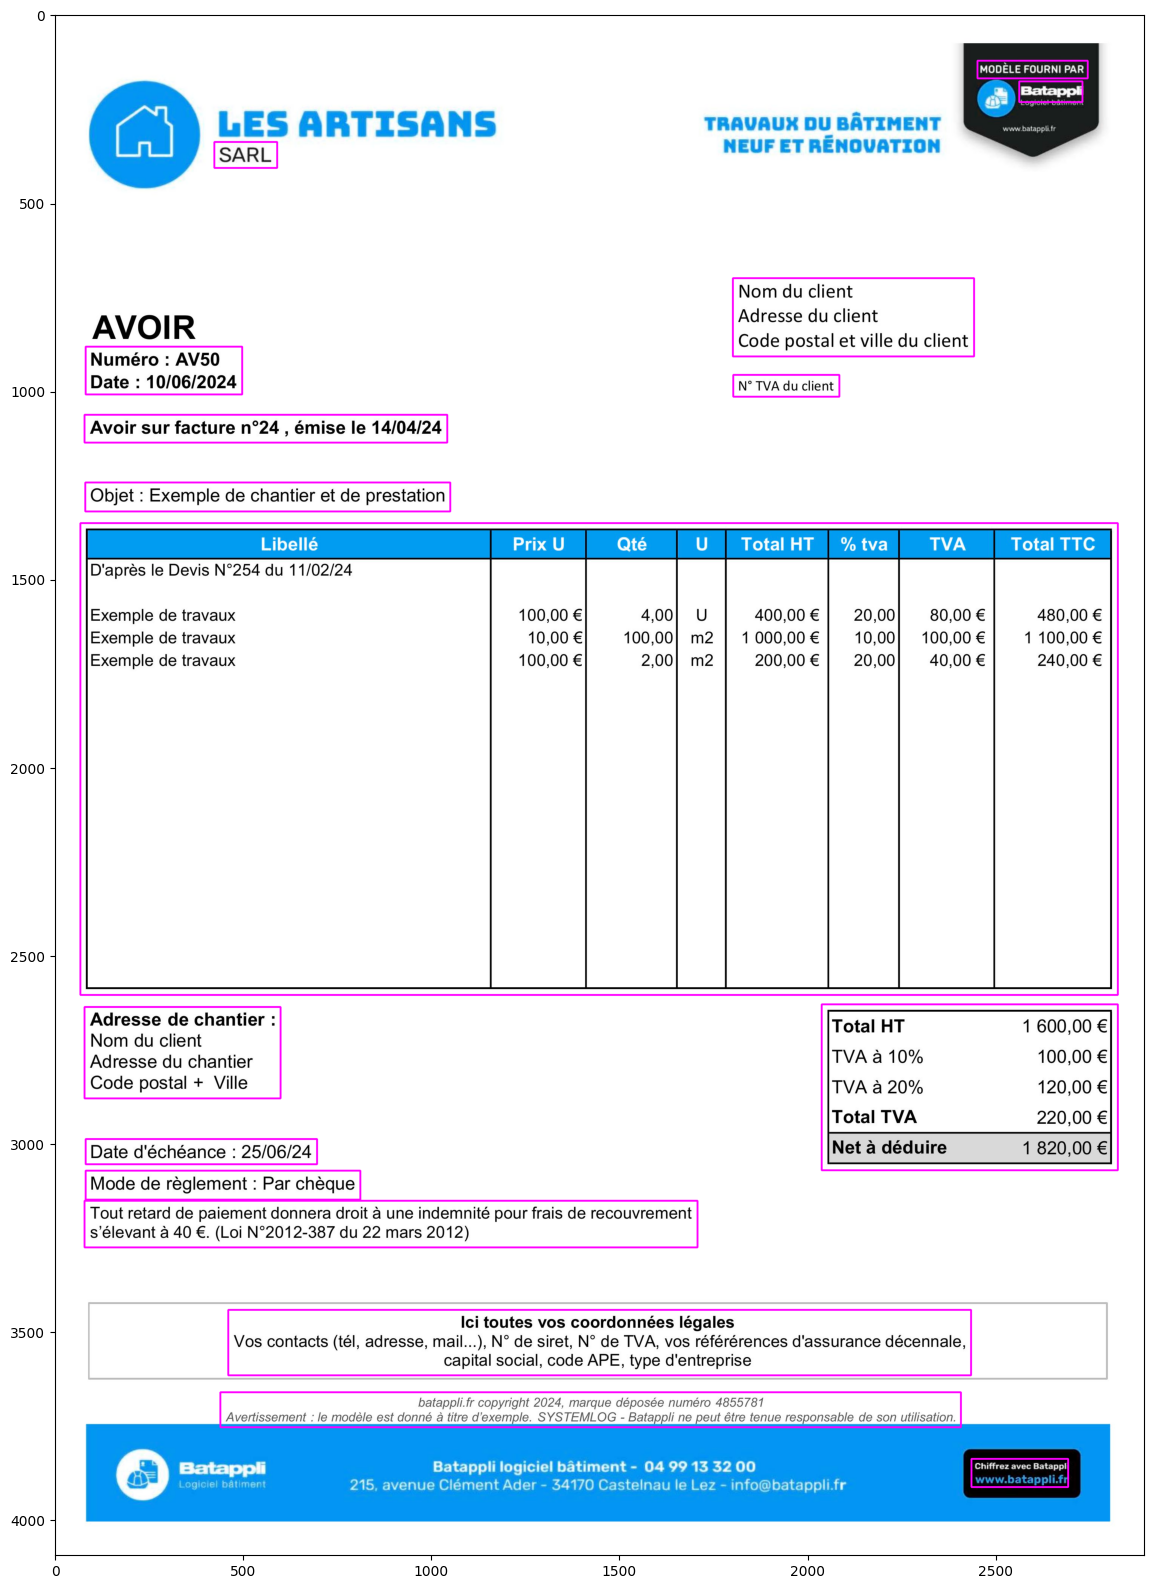

In [24]:
import cv2
import matplotlib.pyplot as plt

# [... define the mark_region method ...]

FILENAME = "../notebook/Page_1.jpg"
image, line_items_coordinates = mark_region(FILENAME)
plt.figure(figsize=(20,20))
plt.imshow(image)

batappli.fr copyright 2024, marque déposée numéro 4855781
Avertissement : le modéle est donné a titre d'exemple. SYSTEMLOG - Batappli ne peut é6tre tenue responsable de son utilisation.



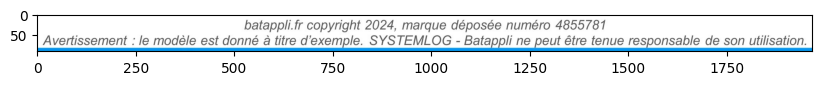

In [25]:
# load the original image
image = cv2.imread("../notebook/Page_1.jpg")

# get co-ordinates to crop the image
c = line_items_coordinates[1]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)